In [47]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [48]:
# Setting up initial parameters
dx = .25
c = .5
cfl = 1
Nx = int(25/dx + 1)
dt = (cfl*dx)/c
Nt = int(10/dt + 1)

In [49]:
#Setting up initial conditions
IC = []

#Making a list of x and t
x = [0]
for i in range(1,Nx):
    x.append(i*dx)
t = [0]
for i in range(1,Nt):
    t.append(i*dt)

#Creating initial conditions
for i in range(0,Nx):
    if 0<=x[i]<=3:
        IC.append(x[i])
    elif 3<=x[i]<=6:
        IC.append(6-x[i])
    else:
        IC.append(0)

In [54]:
#Creating the exact solution
def exact(dx,c,cfl,Nx,dt,Nt,IC,x,t):
    u = np.array(IC) #initalize u with the initial conditions
    u = u[np.newaxis,:] #add the time axis to the previously 1D array
    for n in range (0,Nt): #loop in time
        u = np.vstack([u,np.zeros(Nx)]) #add the new row of 0's to be changed
        for i in range (0,Nx): #loop in space
            if (x[i] - c*dt) <0: #check to see if the location is left of the domain
                u[n+1,i] = 0 #if so, point is 0
            else:          
                loc = x.index(x[i] - c*dt) #find the location of the exact point
                u[n+1,i] = u[n,loc] #solve
    return u

def FTBS(dx,c,cfl,Nx,dt,Nt,IC,x,t):
    u = np.array(IC) #initalize u with the initial conditions
    u = u[np.newaxis,:] #add the time axis to the previously 1D array
    for n in range (0,Nt): #loop in time
        u = np.vstack([u,np.zeros(Nx)]) #add the new row of 0's to be changed
        for i in range (0,Nx): #loop in space
            u[n+1,i] = u[n,i] - cfl*(u[n,i]-u[n,i-1]) #FTBS
    return u

def FTCS(dx,c,cfl,Nx,dt,Nt,IC,x,t):
    u = np.array(IC) #initalize u with the initial conditions
    u = u[np.newaxis,:] #add the time axis to the previously 1D array
    for n in range (0,Nt): #loop in time
        u = np.vstack([u,np.zeros(Nx)]) #add the new row of 0's to be changed
        for i in range (0,Nx): #loop in space
            if i+1 >= Nx: #fixing index issue from i+1 reaching too high a value
                u[n+1,i] = 0
            else:
                u[n+1,i] = u[n,i] - (cfl/2)*(u[n,i+1]-u[n,i-1]) #FTCS
    return u
    
uexact = exact(dx,c,cfl,Nx,dt,Nt,IC,x,t)
uftbs = FTBS(dx,c,cfl,Nx,dt,Nt,IC,x,t)
uftcs = FTCS(dx,c,cfl,Nx,dt,Nt,IC,x,t)

<function matplotlib.pyplot.show(close=None, block=None)>

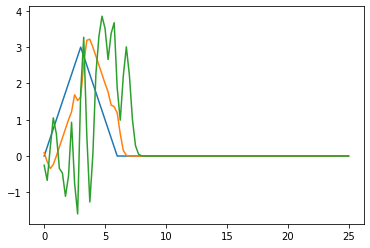

In [62]:
#Creating an excel file for ease of testing        
df = pd.DataFrame (uftcs)
filepath = 'testing.xlsx'
df.to_excel(filepath, index=False)
#Creating the plots at t=0,2,5,10
#plt.plot(x,uexact[t.index(0),:])
#plt.plot(x,uexact[t.index(2),:])
#plt.plot(x,uexact[t.index(5),:])
#plt.plot(x,uexact[t.index(10),:])
#plt.plot(x,uftbs[t.index(0),:])
#plt.plot(x,uftbs[t.index(2),:])
#plt.plot(x,uftbs[t.index(5),:])
#plt.plot(x,uftbs[t.index(10),:])
plt.plot(x,uftcs[t.index(0),:])
plt.plot(x,uftcs[t.index(2),:])
plt.plot(x,uftcs[t.index(5),:])
#plt.plot(x,uftcs[t.index(10),:])
plt.show